In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import joblib


# Data Preprocessing

In [2]:

df = pd.read_csv("/content/drive/MyDrive/BS/Machine Predictive Maintenance Classification/predictive_maintenance.csv")


In [3]:
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [4]:
df.shape

(10000, 10)

In [5]:
df.isnull().sum()

,0
UDI,0
Product ID,0
Type,0
Air temperature [K],0
Process temperature [K],0
Rotational speed [rpm],0
Torque [Nm],0
Tool wear [min],0
Target,0
Failure Type,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


In [7]:
df.drop(columns=['UDI', 'Product ID'],inplace=True)

In [8]:
df.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,M,298.1,308.6,1551,42.8,0,0,No Failure
1,L,298.2,308.7,1408,46.3,3,0,No Failure
2,L,298.1,308.5,1498,49.4,5,0,No Failure
3,L,298.2,308.6,1433,39.5,7,0,No Failure
4,L,298.2,308.7,1408,40.0,9,0,No Failure


In [9]:
df['Target'][df['Target']==1].count()

339

In [10]:
df['Type'].value_counts()

,count
Type,
L,6000
M,2997
H,1003


In [11]:
df[df['Type'] == "L"]["Target"].value_counts()

,count
Target,
0,5765
1,235


In [12]:
df[df['Type'] == "M"]["Target"].value_counts()

,count
Target,
0,2914
1,83


In [13]:
df[df['Type'] == "H"]["Target"].value_counts()

,count
Target,
0,982
1,21


In [14]:
df.groupby(df["Type"])["Target"].mean()

,Target
Type,
H,0.020937
L,0.039167
M,0.027694


In [15]:
df['Failure Type'].value_counts()

,count
Failure Type,
No Failure,9652
Heat Dissipation Failure,112
Power Failure,95
Overstrain Failure,78
Tool Wear Failure,45
Random Failures,18


In [16]:
df["Target"].value_counts()

,count
Target,
0,9661
1,339


In [17]:
df.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,M,298.1,308.6,1551,42.8,0,0,No Failure
1,L,298.2,308.7,1408,46.3,3,0,No Failure
2,L,298.1,308.5,1498,49.4,5,0,No Failure
3,L,298.2,308.6,1433,39.5,7,0,No Failure
4,L,298.2,308.7,1408,40.0,9,0,No Failure


In [18]:
# Initialize and fit LabelEncoder
label_encoder_type = LabelEncoder()
df['Type'] = label_encoder_type.fit_transform(df['Type'])

label_encoder_failure = LabelEncoder()
df['Failure Type'] = label_encoder_failure.fit_transform(df['Failure Type'])

# Save the encoders
joblib.dump(label_encoder_type, "label_encoder_type.pkl")
joblib.dump(label_encoder_failure, "label_encoder_failure.pkl")

['label_encoder_failure.pkl']

In [19]:
df.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,2,298.1,308.6,1551,42.8,0,0,1
1,1,298.2,308.7,1408,46.3,3,0,1
2,1,298.1,308.5,1498,49.4,5,0,1
3,1,298.2,308.6,1433,39.5,7,0,1
4,1,298.2,308.7,1408,40.0,9,0,1


# Data Visualization

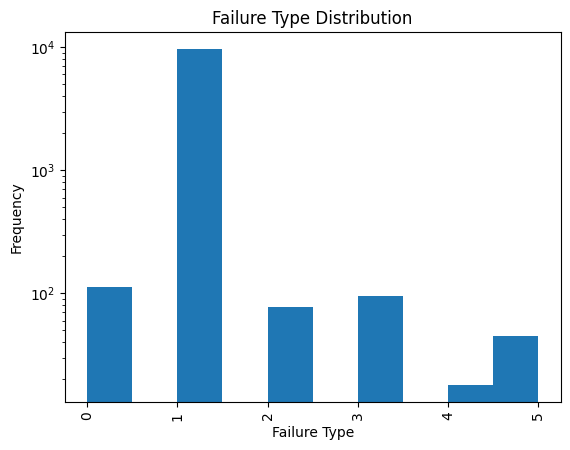

In [20]:
plt.hist(df["Failure Type"],log=True)
plt.xticks(rotation=90)
plt.xlabel("Failure Type")
plt.ylabel("Frequency")
plt.title("Failure Type Distribution")
plt.show()

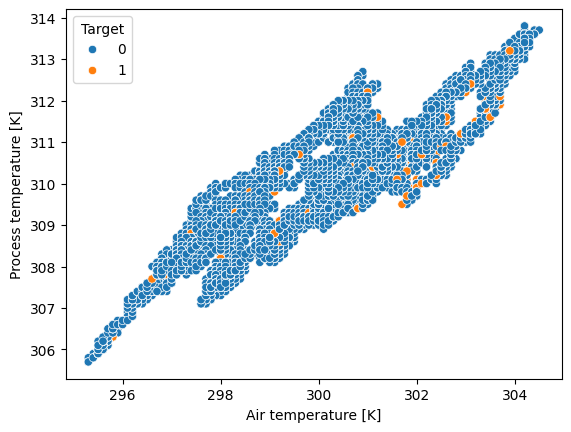

In [37]:
sns.scatterplot(data = df, x="Air temperature [K]", y="Process temperature [K]", hue="Target")
plt.xlabel("Air temperature [K]")
plt.ylabel("Process temperature [K]")
plt.show()

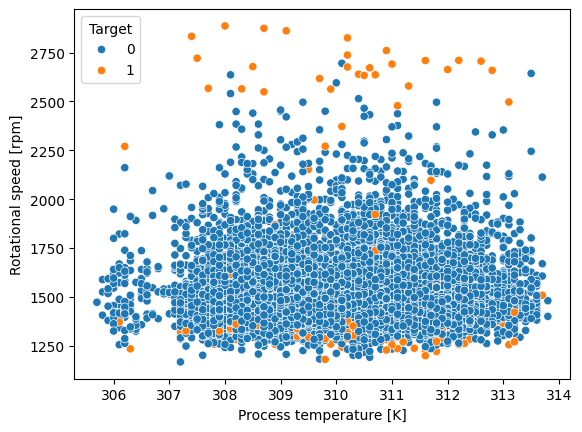

In [41]:
sns.scatterplot(data = df, x="Process temperature [K]", y="Rotational speed [rpm]", hue="Target")
plt.xlabel("Process temperature [K]")
plt.ylabel("Rotational speed [rpm]")
plt.show()

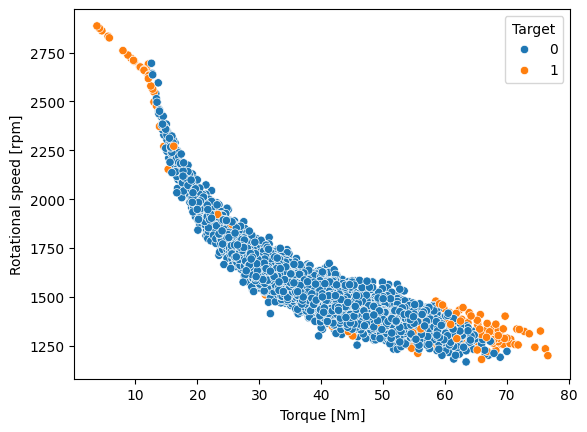

In [21]:
sns.scatterplot(data = df, x="Torque [Nm]", y="Rotational speed [rpm]", hue="Target")
plt.xlabel("Torque [Nm]")
plt.ylabel("Rotational speed [rpm]")
plt.show()

# Encoding

In [22]:
# Split the dataset into training and testing sets
X = df.drop(columns=['Target', 'Failure Type'])
y = df['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
# Normalize numerical features
#columns_to_standardize = ["Rotational speed [rpm]", "Torque [Nm]", "Tool wear [min]", "Temperature"]
#scaler = StandardScaler()
#df[columns_to_standardize] = scaler.fit_transform(df[columns_to_standardize])

In [24]:
# Initialize scaler
scaler = StandardScaler()

# Fit and transform training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform test data (without fitting again)
X_test_scaled = scaler.transform(X_test)

# Save the scaler to a file
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']

In [25]:
# Save the cleaned and preprocessed dataset
df.to_csv('preprocessed_predictive_maintenance.csv', index=False)

# Model Training and Evaluation

---



---



In [26]:
X_train.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
9254,1,298.3,309.1,1616,31.1,195
1561,1,298.2,308.4,1388,53.8,137
1670,1,298.2,307.8,1528,31.1,194
6087,2,300.9,310.8,1599,33.0,7
6669,1,301.4,310.5,1571,33.9,208


In [27]:
y.head()

,Target
0,0
1,0
2,0
3,0
4,0


In [28]:
# Train a Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [29]:
# Evaluate the model
y_pred = model.predict(X_test_scaled)
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1939
           1       0.84      0.59      0.69        61

    accuracy                           0.98      2000
   macro avg       0.91      0.79      0.84      2000
weighted avg       0.98      0.98      0.98      2000

Confusion Matrix:
[[1932    7]
 [  25   36]]
Accuracy Score: 0.984


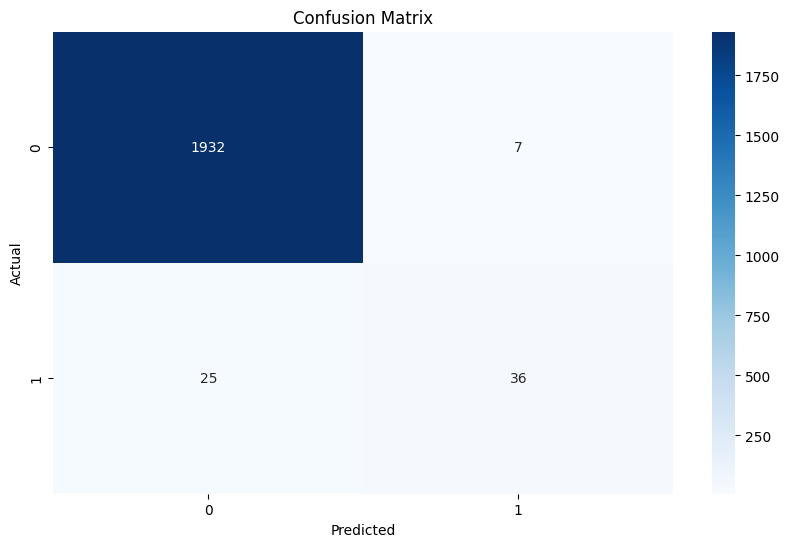

In [30]:
# Visualize the results
plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [31]:
# Save the trained model
joblib.dump(model, 'predictive_maintenance_model.pkl')

['predictive_maintenance_model.pkl']